In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns

from keras.models import load_model

from keras.layers import LSTM, Dense
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

In [3]:
data_1 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/LR_100/*.csv')
data_2 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/RL_100/*.csv')
data_3 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/CW_100/*.csv')
data_4 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/CCW_100/*.csv')
data_5 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/DOWN_100/*.csv')
data_6 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/UP_100/*.csv')

len(data_1), len(data_2), len(data_3), len(data_4), len(data_5), len(data_6)

(100, 100, 100, 100, 100, 100)

In [4]:
total_data = data_1 + data_2 + data_3 + data_4 + data_5 + data_6

dataset = np.zeros((len(total_data), 100, 6))

dataset

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        .

In [5]:
for i, data in enumerate(total_data):
    dataset[i] = pd.read_csv(data, names=['n','na','a','b','c','d','a-b','c-d']).sample(n=100).sort_index().iloc[:,:6]

In [6]:
label = np.array([[1, 0, 0 ,0, 0 ,0]] * len(data_1) + [[0, 1, 0, 0, 0 ,0]] * len(data_2) + [[0, 0, 1, 0, 0 ,0]] * len(data_3) + [[0, 0, 0, 1, 0 ,0]] * len(data_4) + [[0, 0, 0, 0, 1 ,0]] * len(data_5)+ [[0, 0, 0, 0, 0 ,1]] * len(data_6))
dataset.shape, label.shape


((600, 100, 6), (600, 6))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, random_state=0, test_size=0.3)

X_test.shape

(180, 100, 6)

In [13]:
callback = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001), 
    ModelCheckpoint(filepath='./weights.h5', save_best_only=True),
    EarlyStopping(monitor='val_acc', restore_best_weights=True, patience=5)
]

In [14]:
K.clear_session()

In [15]:
model_once = Sequential()

model_once.add(LSTM(20, input_shape=(100,6)))
model_once.add(Dense(64,activation='relu')) #tanh
model_once.add(Dense(6, activation='softmax'))
model_once.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['acc'])

model_once.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                2160      
_________________________________________________________________
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 3,894
Trainable params: 3,894
Non-trainable params: 0
_________________________________________________________________


In [16]:
#result = model_once.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=10, verbose=0)
result = model_once.fit(X_train, y_train, epochs=30)

Epoch 1/30
14/14 [==============================] - 0s 25ms/step - loss: 1.6862 - acc: 0.2667
Epoch 2/30
14/14 [==============================] - 0s 27ms/step - loss: 1.1989 - acc: 0.6024
Epoch 3/30
14/14 [==============================] - 0s 27ms/step - loss: 0.8924 - acc: 0.6833
Epoch 4/30
14/14 [==============================] - 0s 27ms/step - loss: 0.8209 - acc: 0.6643
Epoch 5/30
14/14 [==============================] - 0s 30ms/step - loss: 0.6047 - acc: 0.8048
Epoch 6/30
14/14 [==============================] - 0s 27ms/step - loss: 0.5080 - acc: 0.8381
Epoch 7/30
14/14 [==============================] - 0s 27ms/step - loss: 0.4662 - acc: 0.8381
Epoch 8/30
14/14 [==============================] - 0s 26ms/step - loss: 0.4607 - acc: 0.8738
Epoch 9/30
14/14 [==============================] - 0s 26ms/step - loss: 0.3553 - acc: 0.8524
Epoch 10/30
14/14 [==============================] - 0s 27ms/step - loss: 0.4778 - acc: 0.8190
Epoch 11/30
14/14 [==============================] - 0s 28m

In [29]:
model_once.save('LSTM model.h5')
model_once.evaluate(X_test, y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.0830 - acc: 0.9722


[0.08303535729646683, 0.9722222089767456]

In [136]:
y_test_to_int = np.arange(len(y_test))
x_test_to_int = np.arange(len(X_test)) 

for j in range(len(X_test)):
    x_test_to_int[j] = int(model_once.predict_classes(X_test[j:j+1]))
    for k in range(6):
        if(y_test[j,k] == 1):
            y_test_to_int[j] = k 

In [137]:
count=0
print("Real value : Prediction\n---------------------------")
for i in range(len(X_test)):
    if(y_test_to_int[i] != x_test_to_int[i]):
        print("   ",y_test_to_int[i], "\t   : \t", x_test_to_int[i])
        count = count + 1
probab = count/len(X_test)
print("\n\nNumber of miscalculation : ",count,"/",len(x_test_to_int),"=",round(probab,3))
print("\nAccuracy : ",((1-round(probab,4))*100),"%")
print("0 : LR, 1 : RL, 2 : CW, 3 : CCW, 4 : DOWN, 5 : UP")

Real value : Prediction
---------------------------
    4 	   : 	 1
    3 	   : 	 4


Number of miscalculation :  2 / 180 = 0.011

Accuracy :  98.89 %
0 : LR, 1 : RL, 2 : CW, 3 : CCW, 4 : DOWN, 5 : UP


In [138]:
print(result.history.keys())

dict_keys(['loss', 'acc'])


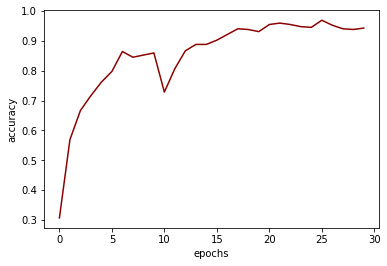

In [139]:
val_loss = result.history['loss']
val_acc = result.history['acc']

plt.plot(val_acc, label='acc', color='darkred')
plt.xlabel('epochs')
plt.ylabel('accuracy')
#ax_acc.grid(linestyle='--', color='lavender')

plt.show()

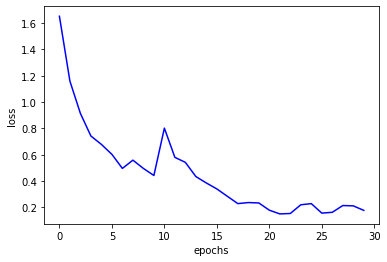

In [140]:
plt.plot(val_loss, label='loss', color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

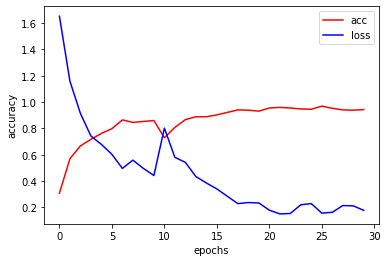

In [143]:
val_loss = result.history['loss']
val_acc = result.history['acc']

plt.plot(val_acc, label='acc', color='red')
plt.plot(val_loss, label='loss', color='blue')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [105]:
tanh_GRU_acc = [87.77, 97.77, 98.33, 97.77, 96.66, 100, 97.78, 97.22, 100, 98.89, 94.44]
tanh_RNN_acc = [94.99, 79.44, 92,78, 87.78, 87.78, 90.56, 91.67, 83.33,  58.33,  95.56 ]
tanh_LSTM_acc = [91.67, 97.78, 97.78, 98.89, 97.2, 98.3, 99.44, 97.78, 97.78, 93.89]

relu_GRU_acc = [98.33, 99.44, 94.99, 98.88, 97.77, 96.6, 97.77, 88.88, 99.44, 98.88]
relu_RNN_acc = [96.11, 95.55, 91,11, 94.99, 92.77, 96.66, 94.44, 94.99, 96.11, 93.33]
relu_LSTM_acc = [98.88, 97.22, 96.11, 98.88, 97.22, 96.11, 96.66, 88.33, 98.88, 96.11]

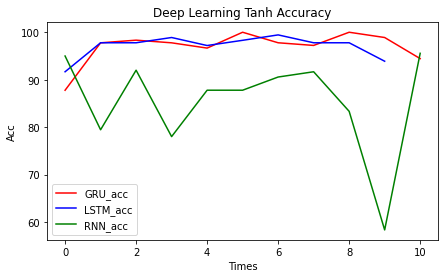

In [112]:
plt.figure(figsize=(7,4))
    
plt.plot(tanh_GRU_acc, label='GRU_acc', c='r')
plt.plot(tanh_LSTM_acc, label='LSTM_acc', c='b')
plt.plot(tanh_RNN_acc, label='RNN_acc',c='g')
plt.title('Deep Learning Tanh Accuracy')
plt.xlabel('Times')
plt.ylabel('Acc')
plt.legend()
plt.show()

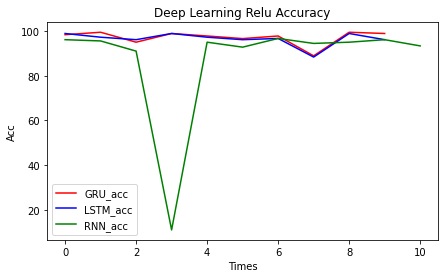

In [121]:
plt.figure(figsize=(7,4))
    
plt.plot(relu_GRU_acc, label='GRU_acc', c='r')
plt.plot(relu_LSTM_acc, label='LSTM_acc', c='b')
plt.plot(relu_RNN_acc, label='RNN_acc',c='g')

plt.title('Deep Learning Relu Accuracy')

plt.xlabel('Times')
plt.ylabel('Acc')
plt.legend()
plt.show()

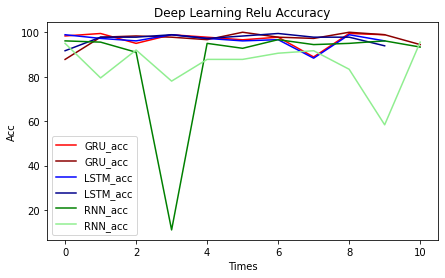

In [122]:
plt.figure(figsize=(7,4))
    
plt.plot(relu_GRU_acc, label='GRU_acc', c='r')
plt.plot(tanh_GRU_acc, label='GRU_acc', c='darkred')

plt.plot(relu_LSTM_acc, label='LSTM_acc', c='b')
plt.plot(tanh_LSTM_acc, label='LSTM_acc', c='darkblue')

plt.plot(relu_RNN_acc, label='RNN_acc',c='g')
plt.plot(tanh_RNN_acc, label='RNN_acc',c='lightgreen')

plt.title('Deep Learning Relu Accuracy')
plt.xlabel('Times')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [124]:
print("Tanh => GRU : ", np.mean(tanh_GRU_acc), "  LSTM : ", np.mean(tanh_LSTM_acc), "  RNN : ", np.mean(tanh_RNN_acc))
print("Relu => GRU : ", np.mean(relu_GRU_acc), "  LSTM : ", np.mean(relu_LSTM_acc), "  RNN : ", np.mean(relu_RNN_acc))


Tanh => GRU :  96.96636363636362   LSTM :  97.051   RNN :  85.40363636363637
Relu => GRU :  97.09799999999998   LSTM :  96.44000000000001   RNN :  86.99545454545455


In [126]:
(96.966 + 97.097)/2

97.0315

In [127]:
(97.051 + 96.44)/2

96.74549999999999

In [128]:
(86.995454545454 + 85.4036)/2

86.199527272727